In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import title
# 'SimHei' 是“黑体”，你可以替换成你系统中的其他字体，如 'Microsoft YaHei' (微软雅黑), 'PingFang SC' (苹方)
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

In [60]:
# 1. 生成时域信号：2Hz正弦波 + 10Hz噪声
t = np.linspace(0, 1, 1024, endpoint=False)  # 时间轴：0-1秒，1024个采样点
signal_clean = np.sin(2 * np.pi * 10 * t)     # 2Hz的纯净正弦波（信号）
noise = 0.5 * np.sin(2 * np.pi * 50 * t)     # 10Hz的噪声
signal_noisy = signal_clean + noise          # 带噪声的时域信号

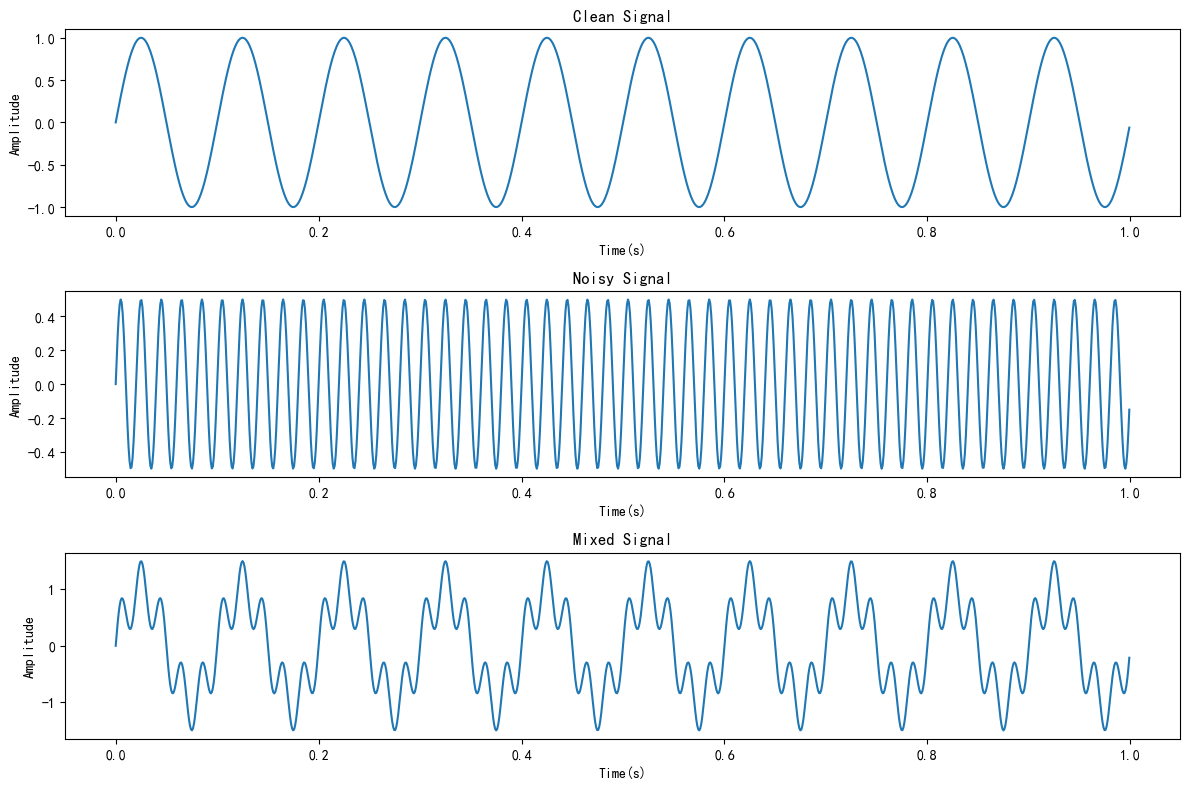

In [61]:
plt.figure(figsize=(12, 8))
ax1=plt.subplot(3, 1, 1)
ax1.plot(t, signal_clean)
ax1.set_title('Clean Signal')
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Amplitude")
ax2=plt.subplot(3, 1, 2)
ax2.plot(t, noise)
ax2.set_title('Noisy Signal')
ax2.set_xlabel("Time(s)")
ax2.set_ylabel("Amplitude")
ax3=plt.subplot(3, 1, 3)
ax3.plot(t, signal_noisy)
ax3.set_title('Mixed Signal')
ax3.set_xlabel("Time(s)")
ax3.set_ylabel("Amplitude")
plt.tight_layout()
plt.show()

### 傅里叶变换（DFT）：时域→频域

In [62]:
fft_result = np.fft.fft(signal_noisy)
freq = np.fft.fftfreq(len(t), d=t[1]-t[0])   # 频率轴：找到混合信号中有哪些频率的信号组成，d=t[1]-t[0]为采样间隔

In [63]:
len(freq),len(fft_result)

(1024, 1024)

### 过滤噪声，保留2Hz的干净信号

In [64]:
fft_filtered = fft_result.copy()
fft_filtered[np.abs(freq) > 10] = 0  # 只保留-3Hz~3Hz的频率成分（包含2Hz）

### 逆傅里叶变换：频域→时域（还原纯净信号）

In [65]:
signal_filtered = np.fft.ifft(fft_filtered).real # 过滤完噪声的信号还原回时序信号

### 绘图展示

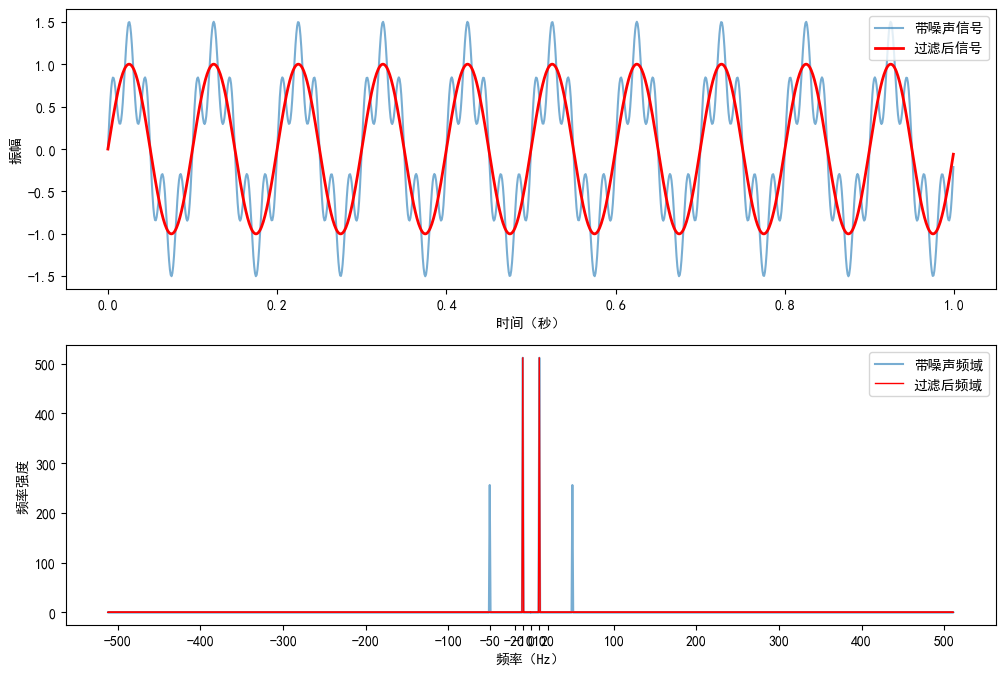

In [66]:
plt.figure(figsize=(12, 8))

# 时域图
plt.subplot(2,1,1)
plt.plot(t, signal_noisy, label='带噪声信号', alpha=0.6)
plt.plot(t, signal_filtered, label='过滤后信号', color='red', linewidth=2)
plt.xlabel('时间（秒）')
plt.ylabel('振幅')
plt.legend()
# 频域图
plt.subplot(2,1,2)
plt.plot(freq, np.abs(fft_result), label='带噪声频域', alpha=0.6)
plt.plot(freq, np.abs(fft_filtered), label='过滤后频域', color='red', linewidth=1)
plt.xticks([-500,-400,-300,-200,-100,-50,-20,-10,0,10,20,100,200,300,400,500])
plt.xlabel('频率（Hz）')
plt.ylabel('频率强度')
plt.legend()
plt.show()

In [67]:
np.abs(fft_filtered)

array([1.51942050e-14, 2.97725357e-14, 5.25096608e-14, ...,
       3.48296006e-14, 4.73434523e-14, 2.97725357e-14])